In [13]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import requests
import json

def fetch_imagenet_labels():
    '''Fetch and parse the list of ImageNet labels.'''
    response = requests.get('https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json')
    response.raise_for_status()  # Raise an exception for HTTP errors
    desc_dict = json.loads(response.text)
    desc_list = [desc_dict[str(i)][1] for i in range(1000)]
    return desc_list

# URL where the ImageNet labels are stored
label_map = fetch_imagenet_labels()
print("Number of ImageNet Classes:", len(label_map))

# Testing our functions
class_index = 200  # example class index (number between 0 and 999)
print(f"Class Index: {class_index}, Label: {label_map[class_index]}")

class_index = 834  # example class index (number between 0 and 999)
print(f"Class Index: {class_index}, Label: {label_map[class_index]}")

Number of ImageNet Classes: 1000
Class Index: 200, Label: Tibetan_terrier
Class Index: 834, Label: suit


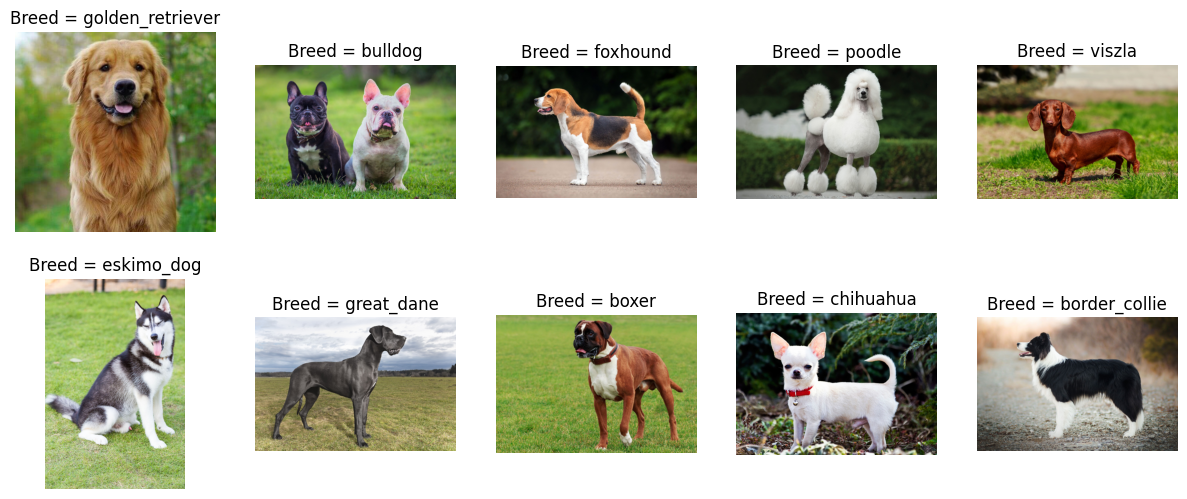

In [12]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def fetch_image_from_url(url):
    '''Fetch an image from the web given its url, and loads it as a PIL image.'''
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for HTTP errors
    image = Image.open(BytesIO(response.content))
    return image

# Example list of dog image URLs
dog_image_urls = {
    "golden_retriever": "https://www.vidavetcare.com/wp-content/uploads/sites/234/2022/04/golden-retriever-dog-breed-info.jpeg",
    "bulldog": "https://cdn.britannica.com/45/233845-050-6B6A7F3E/Two-French-bulldogs.jpg",
    "foxhound": "https://cdn.britannica.com/16/234216-050-C66F8665/beagle-hound-dog.jpg",
    "poodle": "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2023/02/09141023/Diana-the-Poodle.jpg",
    "viszla": "https://encrypted-tbn2.gstatic.com/licensed-image?q=tbn:ANd9GcTbX4kyAKSWkOT_amdu2gC9C2RKjaE6ZQrnLOpK1XSNy41NC0cSZw6eVVBW4lPAAJe_YcF2UAvDhp8pQxc",
    "eskimo_dog": "https://encrypted-tbn3.gstatic.com/licensed-image?q=tbn:ANd9GcQVIYgxyZGmuHAmIdkk-ykz1Jkj-w2gADjrvoq4sDpaAQSJZmv00q6OdwC5vghUHxi5TgY7gD0INW29eOI",
    "great_dane": "https://t3.gstatic.com/licensed-image?q=tbn:ANd9GcRcAG6kQ7sRfqAFpa0cTDReX1H2XvoAyl0wXspv8l3eghN4akRvQoPbdtIU9_s7BrLM",
    "boxer": "https://cdn.britannica.com/46/233846-050-8D30A43B/Boxer-dog.jpg",
    "chihuahua": "https://encrypted-tbn2.gstatic.com/licensed-image?q=tbn:ANd9GcR3frqA6qXxPHb5gk9vrZQgcHHA78oUVPshn_5s4k1SQ4hUnq7ScWTNp2YOgJYhUuDeLP5hRI_KJXujwiU",
    "border_collie": "https://cdn.britannica.com/25/234625-050-6070814C/Border-Collie-dog.jpg"
}

plt.figure(figsize=(15, 6)) 
for i, (breed, url) in enumerate(dog_image_urls.items()):
    img = fetch_image_from_url(url)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Breed = {breed}")
plt.show()

In [4]:
import torchvision.transforms as transforms

# Define the preprocessing transforms for CNN inputs
transform = transforms.Compose([
    transforms.Resize(256),           # Resize the short side of the image to 256
    transforms.CenterCrop(224),       # Crop a center patch of the image of size 224x224
    transforms.ToTensor(),            # Convert the image to tensor format
    transforms.Normalize(             # Normalize using ImageNet's mean and standard deviation
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Define the model
alexnet = torchvision.models.alexnet(pretrained=True)
alexnet.eval()

# Fetch the image and preprocess it
url = dog_image_urls['golden_retriever']
img = fetch_image_from_url(url)
img_t = transform(img)

# Feed the image to the classifier and compute the most likely prediction
pred = alexnet(img_t[None])
pred_class_index = pred.argmax(axis=1)
print("AlexNet Prediction: ", label_map[pred_class_index])

AlexNet Prediction:  wine_bottle


## Pretrained models
PyTorch provides a library of pretrained models for image classification.

- A complete list is provided [here](https://pytorch.org/vision/stable/models.html) together with the performance of the pretrained model on the ImageNet dataset.
- You can also list all available pretrained models in PyTorch by running `torchvision.models.list_models()`

All these models can be instatiated in a similar way as the AlexNet example. 

Predict the class of each of the images above using the following models: alexnet, vgg16, resnet50, densenet121.

Which network seems to be the most accurate on these images? Compare this observation with their ImageNet classification performance listed in [here](https://pytorch.org/vision/stable/models.html).

In [ ]:
models = {
    'alexnet': torchvision.models.alexnet(pretrained=True).eval(),
    'vgg16': ...,
    'resnet50': ...,
    'densenet121': ...,
}

for i, (breed, url) in enumerate(dog_image_urls.items()):
    img = ...     # Fetch image
    img_t = ...   # Prepare image for pytorch model

    plt.figure(figsize=(20, 4))     
    for j, arch in enumerate(models.keys()):
        pred = ...                 # Using models[arch], compute the model's prediction
        pred_class_index = ...     # Find the most likely class index
        pred_class_label = label_map[pred_class_index]

        # Plot the image, labels and predictions
        plt.subplot(1, len(architectures), 1 + j)
        plt.imshow(img)
        plt.axis(False)
        plt.title(f"{arch}\nPred = {pred_class}\n Breed = {breed}")
    plt.show()

## Visualizing ResNet activations
While pre-trained models may seem like black-boxes (they output predictions without justifications for their predictions), we can develop an intuition for the model inner workings, by visualizing either the models weights or their activations for a particular image. 
Lets try to visualize a resnet50 model.

In [7]:
import torch.nn as nn
url = "https://i.pinimg.com/originals/c7/77/73/c77773431af1e9ffa724e70bbf7dd3a0.jpg"
img = fetch_image_from_url(url)
img_t = transform(img)

model = torchvision.models.resnet50(pretrained=True)
model.eval()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

As can be seen in the model architecture above, the first layer in the ResNet is the `conv1` layer. More information about this convolutional layer can be obtained by runing `print(model.conv1)`.
Its weights can be accessed at `model.conv1.weight`. The code below visualizes each filter.

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


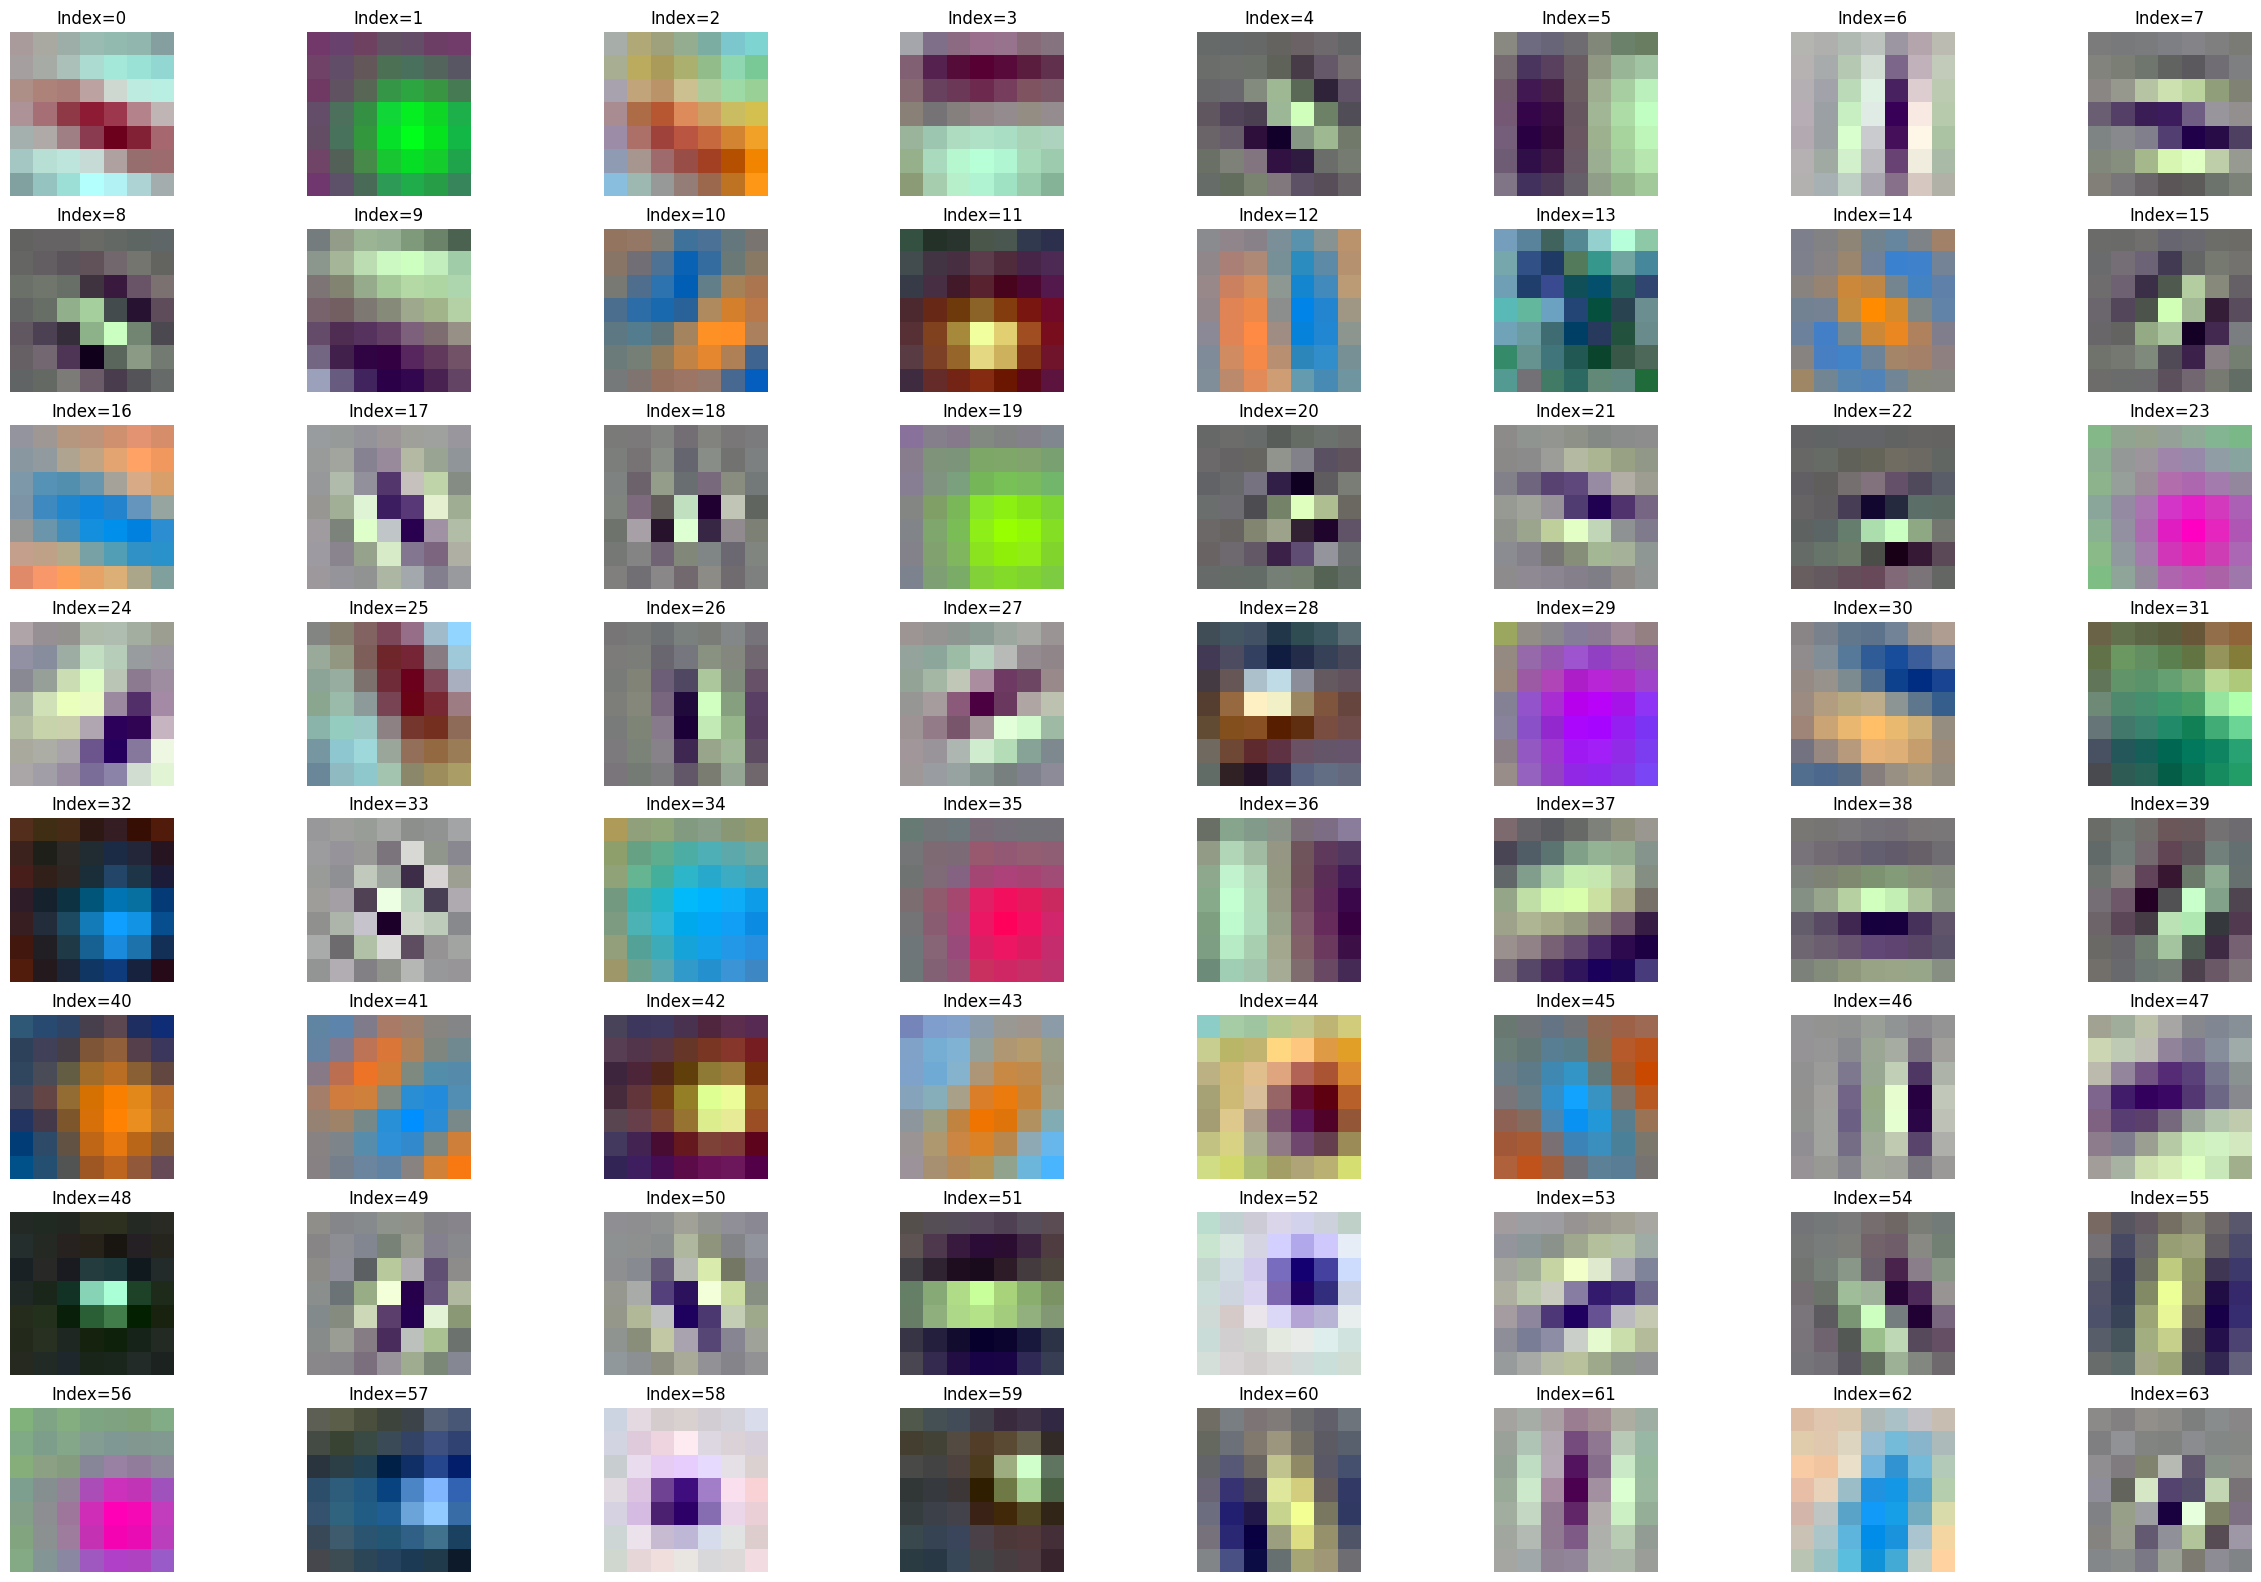

In [9]:
print(model.conv1)

# First normalize each filter between 0 and 1 in order to display them nicely
max = model.conv1.weight.flatten(1).max(1)[0][:, None, None, None]
min = model.conv1.weight.flatten(1).min(1)[0][:, None, None, None]
conv1_weights = (model.conv1.weight - min) / (max - min)

plt.figure(figsize=(30, 20))
for i, f_idx in enumerate(range(64)):
    plt.subplot(8, 8, 1+i)
    
    # After indexing the conv1_weights, we need to permute because plt assumes that the color dimension is the last one.
    filter = conv1_weights[f_idx].permute(1, 2, 0)
    plt.imshow(filter.detach())
    plt.title(f"Index={f_idx}")
    plt.axis(False)
plt.show()

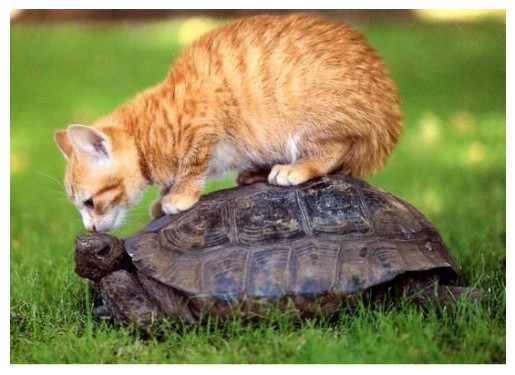

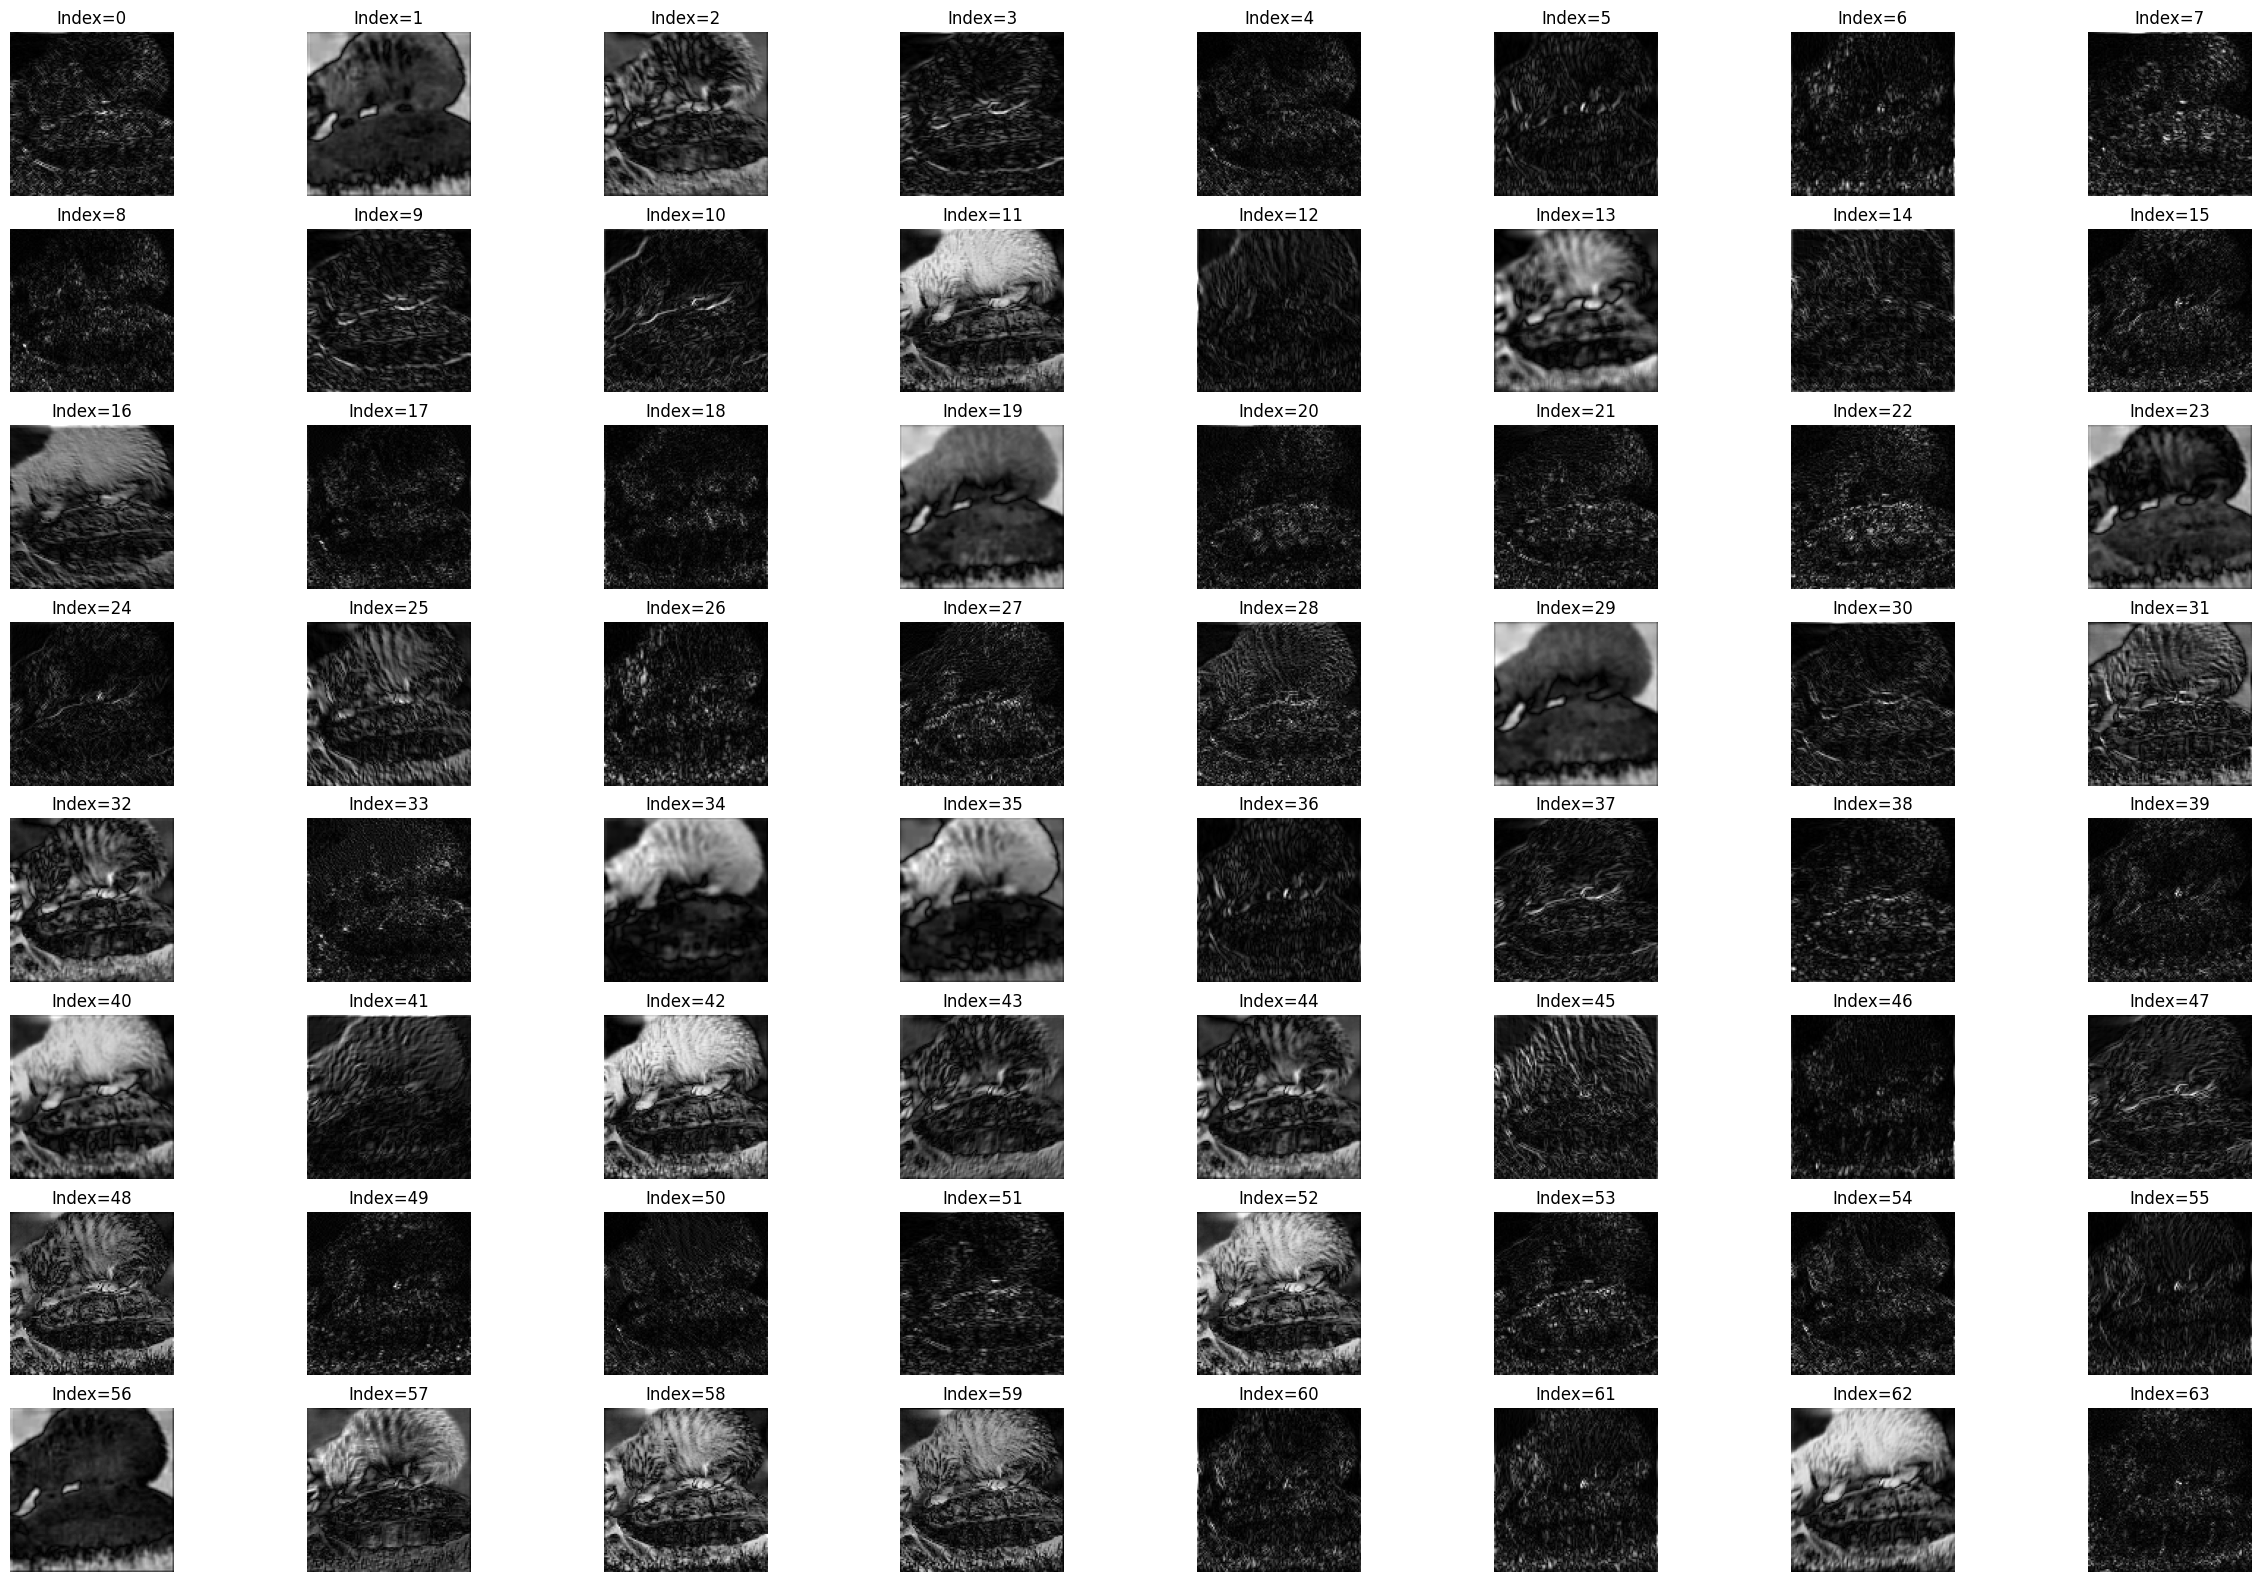

In [11]:
feats = model.conv1(img_t[None])

plt.imshow(img)
plt.axis(False)
plt.show()

plt.figure(figsize=(30, 20))
for i, f_idx in enumerate(range(64)):
    plt.subplot(8, 8, 1+i)
    plt.imshow(feats[0, f_idx].abs().detach().numpy(), cmap='gray')
    plt.title(f"Index={f_idx}")
    plt.axis(False)
plt.show()

**Question** Can you interpret the visualizations of the weights and the activations above? 

For example:
- What parts of the image do filters 1 and 19 get activated by? Could you predict this from the kernel itself?
- How about filters 11 and 42?
- How about filter 25 and 45?